# Lab 9: Principal Component Analysis (PCA)

In this session, we will apply the principal component analysis (PCA) technique to reduce the dimension of some data. This reduction allows us to decrease the number of features with conserving most of the information in the data which accelerates the learning algorithm without affecting a lot its expressiveness. In addition, the PCA helps to compress data and recover it without loosing a lot of significant information. Besides, in some cases, this technique helps to visualize on 2D and 3D graphs higher dimension data not visualizable in the original dimension.

First, we will implement the PCA on 2D data and visualize the original and recovered data. Then, we will calculate the error between recovered data and original one. In the second part, we will generate low rank 3D data and we will use [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) module from sklearn library to project it in a 2D plane. Then, we will try to visualize the data projected in 2D plane. Finally, we will work with "faces" dataset and we will try to compress it using PCA. Then, we will calculate the compression rate, the error and see how to choose the reduction dimension.

## Preparation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d.axes3d import*
from sklearn.decomposition import PCA
%matplotlib notebook

## Part 1: Implement PCA
In this part, we will use Singular Vale Decomposition (SVD) to implement PCA. In fact ,the SVD determines the eigenvalues  and their corresponding  eigenvectors in decreasing order. the first K eigen vectors represent the K most important components of our data. Hence, we will project our data on these eigenvectors. Then, we will recover the data by doing the inverse transformation and we will calculate the error.

**Question 1: **
- Load the data from "2D_data.txt" file in "X" variable and check its size. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library) 
- Determine the number of samples m.

In [5]:
# load data
# Type your code here
X = np.loadtxt("2D_data.txt")
print("The size of data is:",X.shape)
# Type your code here
m = X.shape[0]

The size of data is: (50, 2)


Let's visualize the data.

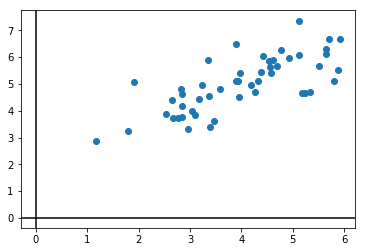

In [6]:
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1])
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

**Question 2: **
- Calculate the mean "mu" and the standard deviation "std" of the data. Then, calculate "X_norm" the normalized data. 
- Calculate the covariance matrix "SIGMA" given by: $\Sigma=\frac{1}{m}X_{norm}^\top X_{norm}$.

In [7]:
# normalize data
# Type your code here
mu = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_norm=(X-mu)/std
print(X_norm.shape)
# Singular value decomposition
# Type your code here
SIGMA = np.dot(np.transpose(X_norm),X_norm)/m

(50, 2)


Let's visualize the normalized data.

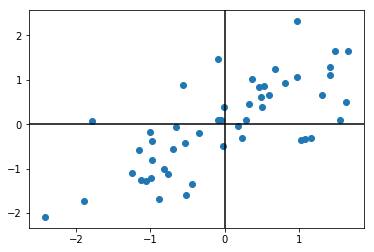

In [8]:
fig, ax = plt.subplots()
ax.scatter(X_norm[:,0],X_norm[:,1])
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

**Question 3: **
- Use [svd](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) function from sklearn library to make singular value decomposition of $\Sigma$. This function will compute 3 arrays: U, S and V. The arrays "U" and "V" contain the eigenvectors. They are orthogonal matrix so the inverse is equal to the transpose and they are the inverses of each other. While "S" contains the eigenvalues. These arrays verify the following formulas:$$\Sigma=U\times diag(S)\times V$$

In [6]:
# Type your code here
U,S,V = np.linalg.svd(SIGMA, full_matrices=True)
print("The size of U is:",U.shape)
print("The size of S is:",S.shape)
print("The size of V is:",V.shape)

The size of U is: (2, 2)
The size of S is: (2,)
The size of V is: (2, 2)


**Question 4: **
- Calculate the projected data "Z" given by: $Z=X_{norm}\times U_K$  
Where: $U_K$ represent the first K columns of the $U$ matrix.
- Calculate the recovered data given by: $X_{rec}=Z\times U_K^{-1}=Z\times U_K^\top$ 
- Calculate the projection error: $\frac{1}{m}\sum_{i=1}^m\left \| x_{norm}^{(i)}-x_{rec}^{(i)} \right \|^2$  
where: $\left \| x \right \|^2=\sum_{j=1}^nx_j^2$ 

In [7]:
K=1 # reduction dimension
# project dataon K dimension
# Type your code here
Z =np.dot(X_norm,U[:,:K])
print(Z.shape)
# recover data
# Type your code here
X_rec = np.dot(Z,np.transpose(U[:,:K]))
# calculate error 
# Type your code here
proj_error = (np.sum((X_norm-X_rec)**2))/m
print("The projection error is:",proj_error)

(50, 1)
The projection error is: 0.26446962373662686


Let's visualize the data with the principal components (projection direction).

Text(0.5, 1.0, 'Projection error')

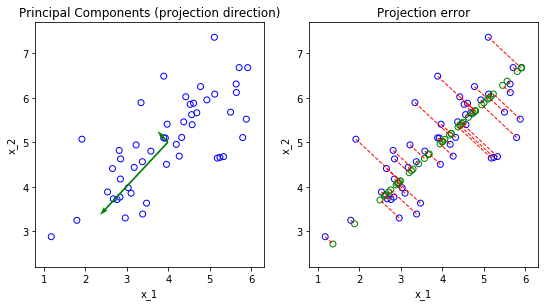

In [8]:
# plot data
fig = plt.figure("PCA 2D data",figsize=(9,4.5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0],X[:,1],color="blue",marker='o',facecolors='none')
ax.quiver(mu[0],mu[1],S[0]*U[0,0],S[0]*U[1,0],color='green',scale=0.75,scale_units='xy',angles='xy')
ax.quiver(mu[0],mu[1],S[1]*U[0,1],S[1]*U[1,1],color='green',scale=0.75,scale_units='xy',angles='xy')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_xlim(0.8,0.8+5.5)
ax.set_ylim(2.2,2.2+5.5)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title("Principal Components (projection direction)")

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X[:,0],X[:,1],color="blue",marker='o',facecolors='none')
ax.scatter(std[0]*X_rec[:,0]+mu[0],std[1]*X_rec[:,1]+mu[1],color='green',marker='o',facecolors='none')
for i in range(m):
    ax.plot([X[i,0],std[0]*X_rec[i,0]+mu[0]],[X[i,1],std[1]*X_rec[i,1]+mu[1]],'r--',linewidth=1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_xlim(0.8,0.8+5.5)
ax.set_ylim(2.2,2.2+5.5)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title("Projection error")

<font color ="red">Observation</font>:
- In the first figure, we can see there are 2 vectors show the standard deviation: the std value in one direction is smaller then another.
- Therefore, in order to minimize the errors, we should project data to line which is perpendicular to the vector, which has smaller std value.
- By that way, in future, The sum of error will be smaller.

## Part 2: PCA with Sklearn
In this part, we will use sklearn library functions to generate low rank 3D data and apply the PCA on it. Then, we will visualize it in a 2D plane.

**Question 1: ** 
- Generate low rank data of size $50\times 3$. You should use [make_low_rank_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_low_rank_matrix.html#sklearn.datasets.make_low_rank_matrix) function with the following parameters: "effective_rank=2","tail_strength=0.01" and "random_state=0"
- Calculate the mean "mu" and the standard deviation "std" of the data. Then, calculate "X_norm" the normalized data. 

In [9]:
# generate data
# Type your code here

X=datasets.make_low_rank_matrix(50,3,2, 0.01, random_state=0)
m = X.shape[0]
K = 2 # reduction dimension
print(m)
# normalize data
# Type your code here
mu = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_norm=(X-mu)/std

50


**Question 2: ** 
- Use [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) module from sklearn library to create "pca" object with "n_components" equal to "K".
- Call [fit](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit) function of "pca" object with normalized data "X_norm".
- Determine U the eigenvectors matrix using the attribute components_.

In [10]:
# PCA
# Type your code here
pca = PCA(n_components=K)
# Type your code here
pca.fit(X_norm)

# projection plane coefficient
# Type your code here
U= pca.components_

print("The principal eigenvectors are:\n",U.T)

The principal eigenvectors are:
 [[-0.07241944 -0.91503598]
 [-0.69156001  0.33275736]
 [ 0.71867947  0.22799495]]


**Question 4: ** 
- Use [transform](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) function of the "pca" object to project "X_norm" data and put the result in the variable "Z".
- Use [inverse_transform](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform) function of the "pca" object to recover data "X_rec" from the projected data "Z".
- Calculate the projection error: $\frac{1}{m}\sum_{i=1}^m\left \| x_{norm}^{(i)}-x_{rec}^{(i)} \right \|^2$  
where: $\left \| x \right \|^2=\sum_{j=1}^n x_j^2$ 

In [12]:
# project data
# Type your code here
Z = pca.transform(X_norm)

# recover data
# Type your code here
X_rec = pca.inverse_transform(Z)

# calculate error 
# Type your code here
x = np.sum(((X_norm-X_rec)**2),axis=1)
proj_error = np.sum(x, axis=0)/m
print("The projection error is:",proj_error)

The projection error is: 0.24712247816168517


Let's visualize the data with the principal components (projection direction).

Text(0.5, 1.0, 'Projection plane')

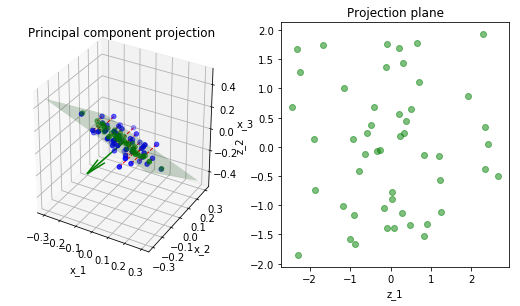

In [13]:
a=U[0,1]*U[1,2]-U[0,2]*U[1,1]
b=U[0,2]*U[1,0]-U[0,0]*U[1,2]
c=U[0,0]*U[1,1]-U[0,1]*U[1,0]

# meshgrid for plane
x=np.array([[-0.3,-0.3],[0.3,0.3]])
y=np.array([[-0.3,0.3],[-0.3,0.3]])
z=-a/c*x-b/c*y

# plot data
fig = plt.figure("PCA 3D data",figsize=(9,4.5))
ax = fig.add_subplot(1, 2, 1,projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c="b", marker="o",facecolors='none')
ax.scatter(std[0]*X_rec[:,0]+mu[0], std[1]*X_rec[:,1]+mu[1], std[2]*X_rec[:,2]+mu[2], c="g", marker="o",facecolors='none',alpha=0.5)
ax.plot_surface(x,y,z,color="g",linewidth=1,alpha=0.2)
ax.quiver(0,0,0,a,b,c,color='g', arrow_length_ratio=0.4,length=0.3)
for i in range(m):
    ax.plot([X[i,0],std[0]*X_rec[i,0]+mu[0]],[X[i,1],std[1]*X_rec[i,1]+mu[1]],[X[i,2],std[2]*X_rec[i,2]+mu[2]],'r--',linewidth=1)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')
ax.set_title("Principal component projection")

ax = fig.add_subplot(1, 2, 2)
plt.scatter(Z[:,0],Z[:,1],c="g",alpha=0.5)
ax.set_xlabel('z_1')
ax.set_ylabel('z_2')
ax.set_title("Projection plane")

<font color ="red">Observation</font>:
- The chosen plan is the plan that is perpendicular to the vector, which has smaller standard deviation value.
- By this way, the projection error could be come smaller.

## Part 3: Faces dataset compression
In this last part, we will try to compress face images using principal component analysis (PCA). Then, we will evaluate the compression performance by calculating the compression ratio and the retained variance ratio.

In [14]:
def Display_faces(X_display,fig_name,Vmax=None,Vmin=None):
    """
    display face image contained in X_display 
    """
    if (Vmax==None):
        Vmax=X_display.max()
    if (Vmin==None):
        Vmin=X_display.min()
    # calculate number and size of patches fo each digit image
    nbr_select=X_display.shape[0] # number of digits to display
    origin_img_size=int(np.sqrt(X_display.shape[1]))
    nbr_patch_horiz=int(np.floor(np.sqrt(nbr_select)))
    nbr_patch_vertic=int(np.ceil(nbr_select/nbr_patch_horiz))
    img_width=32
    img_height=32
    
    # create Display_matrix that contains all image patches
    Display_matrix=-np.ones((nbr_patch_vertic*(img_height+1)-1,nbr_patch_horiz*(img_width+1)-1))
    for i in range(nbr_patch_vertic):
        for j in range(nbr_patch_horiz):
            if (i*nbr_patch_horiz+j>=nbr_select):
                break
            Display_matrix[i*(img_height+1):(i+1)*img_height+i,j*(img_width+1):(j+1)*img_width+j]=np.reshape(X_display[i*nbr_patch_horiz+j,np.arange(origin_img_size**2)%origin_img_size<img_height][:img_width*img_height],(img_height,img_width),order='F')
    plt.figure(fig_name,figsize=(max(3,nbr_patch_horiz),max(3,nbr_patch_vertic)))
    plt.imshow(Display_matrix,cmap="gray",vmax=Vmax,vmin=Vmin)
    plt.axis('off')
    plt.show()

**Question 1: ** 
- Load the data from "face.txt" file in "face" variable and check its size. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library)  
This dataset contains 5000 of $32 \times 32$ pixel images. These images are flatten and saved on a single line of 1024 pixels on our dataset.

In [15]:
# load data
# Type your code here
face=np.loadtxt('face.txt')
print("The size of face dataset is:",face.shape)
m = 5000

The size of face dataset is: (5000, 1024)


Let's visulize the data.

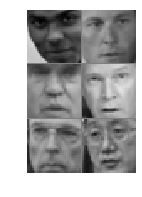

In [16]:
# visualize data
nbr_select=2
np.random.seed(0)
rand_perm=np.random.permutation(m)
Display_faces(face[rand_perm[:nbr_select*3],:],'Visualize some face images', 128,-128)

**Question 2: ** 
- Calculate the covariance matrix "SIGMA" given by: $\Sigma=\frac{1}{m}X_{norm}^\top X_{norm}$.
- Use [svd](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) function from sklearn library to make singular value decomposition. This function will compute 3 arrays: U, S and V. The arrays "U" and "V" contain the eigenvectors. They are orthogonal matrix so the inverse is equal to the transpose and they are the inverses of each other. While "S" contains the eigenvalues. these arrays verify the following formulas:$$\Sigma=U\times diag(S)\times V$$

In [17]:
K = 100 # reduction dimension

# Singular value decomposition
# Type your code here
SIGMA = np.dot(np.transpose(face[0:m,:]),face[0:m,:])/m
U,S,V = np.linalg.svd(SIGMA)

**Question 3: **  
- Calculate the projected data "Z" given by: $Z=face\times U_K$  
Where: $U_K$ represent the first K columns of $U$ matrix.
- Calculate the recovered data given by: $face_{rec}=Z\times U_K^{-1}=Z\times U_K^\top$ 

In [18]:
# data projection and recovery
# Type your code here
Z = np.dot(face[0:m,:],U[:,0:K])
face_rec = np.dot(Z,U[:,0:K].transpose())
print(Z.shape)

(5000, 100)


**Question 4: ** 
- Calculate compression ratio "comp_ratio": number of pixel of original dataset/ (number of pixel of compressed  data+size of K columns of matrix U necessary for recovery)
- Calculate the retained variance ratio "retain_var": $$1-\frac{\sum_{i=1}^m\left \| face^{(i)}-face_{rec}^{(i)} \right \|^2}{\sum_{i=1}^m\left \| face^{(i)} \right \|^2}$$
- Change value of "K" in the previous block and re-execute to see how retained variance vary.

In [19]:
#calulate comression ratio and retained varaince
# Type your code here
comp_ratio=(face[0:m,:].shape[0]*face[0:m,:].shape[1])/((face_rec.shape[0]*face_rec.shape[1])+K*U.shape[0])
print("The compression ratio is: %.2f"%comp_ratio)
# Type your code here
x1 = np.sum(((face[0:m,:]-face_rec[0:m,:])**2),axis=1) #numérateur
x2 = np.sum(((face[0:m,:])**2),axis=1)
num = np.sum(x1, axis=0)
den = np.sum(x2, axis=0)
retain_var=1-(num/den)
print("%.2f"%(retain_var*100),"% of variance is retained")

The compression ratio is: 0.98
94.34 % of variance is retained


Let's display the compressed images and some principal components.

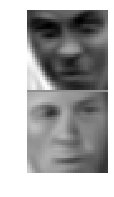

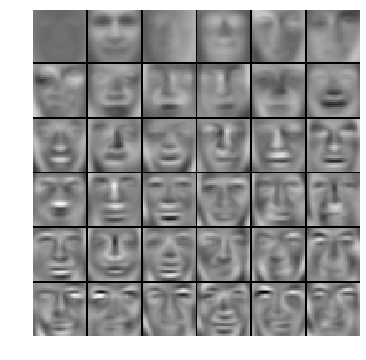

In [20]:
# display compressed image and some principal component
Display_faces(face_rec[rand_perm[:nbr_select],:],'Compressed images')
Display_faces(U[:,:36].T,'Principal components')

<font color ="red">Observation</font>:
- We are able to reduce the 5000 image database which has size of 61 Mb which tha ratio is up to 98%!!, and most of the original image data retained. That’s a huge safe space!